In [4]:
!pip install tensorflow

In [8]:
import tensorflow as tf

In [9]:
print(tf.__version__)

2.18.0


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [30]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [47]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [48]:
#FEATURE
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)
X = X.drop(['Geography', 'Gender'], axis = 1)

In [49]:
X = pd.concat([X,geography, gender], axis = 1).astype(int)

In [50]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [53]:
X_train.shape

(8000, 11)

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU, LeakyReLU, ELU,ReLU
from keras.layers import Dropout

In [55]:
classifier=Sequential()

In [56]:
classifier.add(Dense(units=11,activation='relu'))

In [57]:
classifier.add(Dense(units=7,activation='relu'))

In [58]:
classifier.add(Dense(units=6,activation='relu'))

In [59]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [63]:
opt = keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [64]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [66]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100,callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7840 - loss: 0.4802 - val_accuracy: 0.8266 - val_loss: 0.4284
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8433 - loss: 0.3806 - val_accuracy: 0.8432 - val_loss: 0.3795
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8552 - loss: 0.3576 - val_accuracy: 0.8379 - val_loss: 0.3775
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8607 - loss: 0.3485 - val_accuracy: 0.8485 - val_loss: 0.3682
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8603 - loss: 0.3409 - val_accuracy: 0.8440 - val_loss: 0.3722
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8580 - loss: 0.3443 - val_accuracy: 0.8413 - val_loss: 0.3743
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8665 - loss: 0.3301 - val_accuracy: 0.8463 - val_loss: 0.3702
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8607 - loss: 0.3389 - val_accu

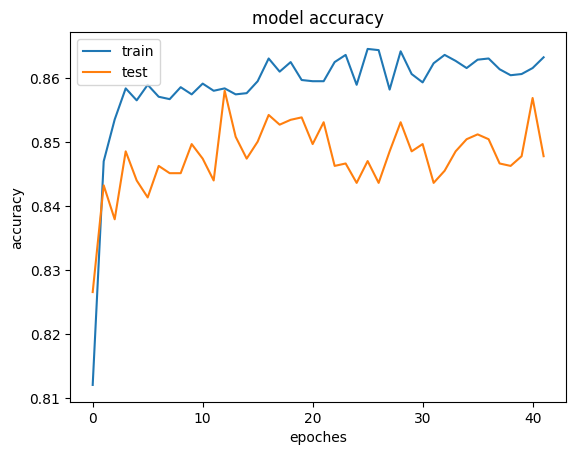

In [67]:
# summarize the history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoches')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

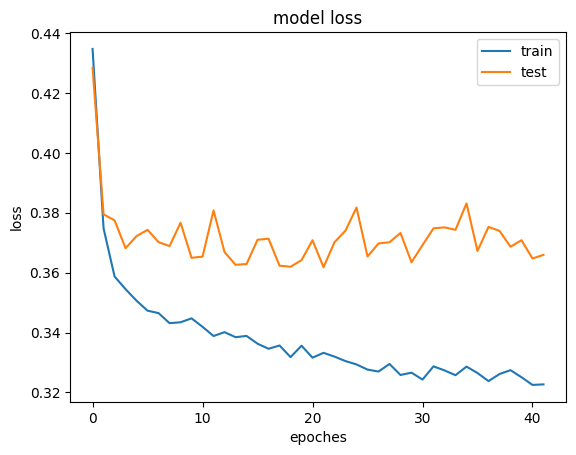

In [68]:
#summarize the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc= 'upper right')
plt.show()

In [71]:
# test the model on test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1562   33]
 [ 255  150]]


In [72]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.856
